In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('C:/Users/lenovo/foolad.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df=df.tail(220)

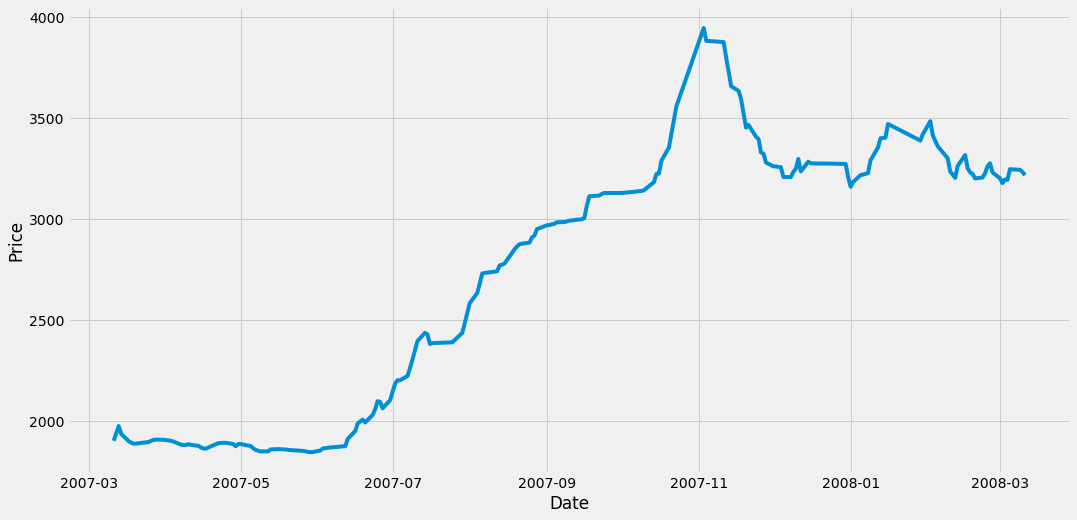

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df.index,df['Close'],label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
delta=df['Close'].diff(1)
delta.dropna()

2008-03-10    17.0
2008-03-09    10.0
2008-03-05     3.0
2008-03-04   -53.0
2008-03-03     2.0
              ... 
2007-03-17    13.0
2007-03-14    36.0
2007-03-13    39.0
2007-03-12   -35.0
2007-03-11   -38.0
Name: Close, Length: 219, dtype: float64

In [5]:
up=delta.copy()
down=delta.copy()
up[up<0]=0
down[down>0]=0

In [6]:
period=14
avg_gain=up.rolling(window=period).mean()
avg_loss=abs(down.rolling(window=period).mean())
RS = avg_gain/avg_loss
RSI = 100.0 - (100.0/(1.0+RS))

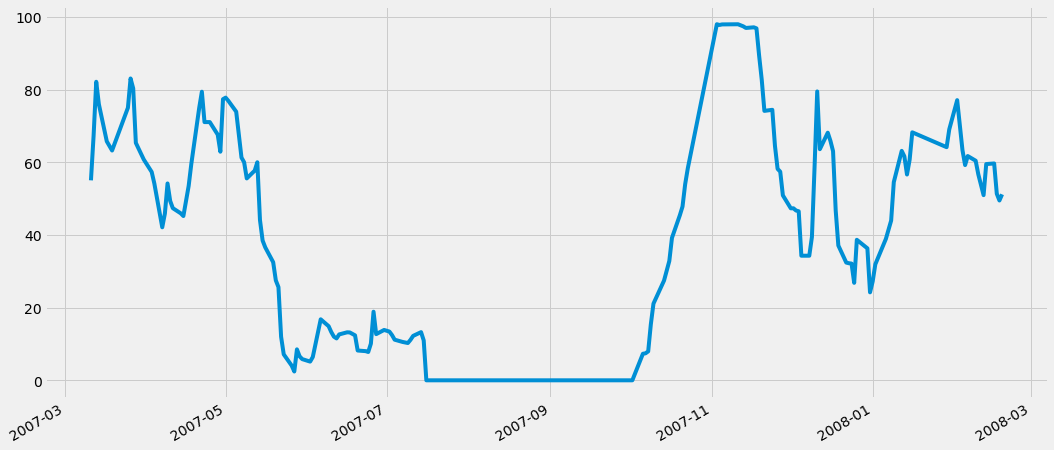

In [7]:
plt.figure(figsize=(16,8))
RSI.plot()
plt.show()

In [8]:
newdf=pd.DataFrame()
newdf['Close']=df['Close']
newdf['RSI']=RSI
newdf

,Close,RSI
2008-03-11,3216,NaN
2008-03-10,3233,NaN
2008-03-09,3243,NaN
2008-03-05,3246,NaN
2008-03-04,3193,NaN
...,...,...
2007-03-17,1898,65.753425
2007-03-14,1934,75.961538
2007-03-13,1973,82.142857
2007-03-12,1938,67.251462


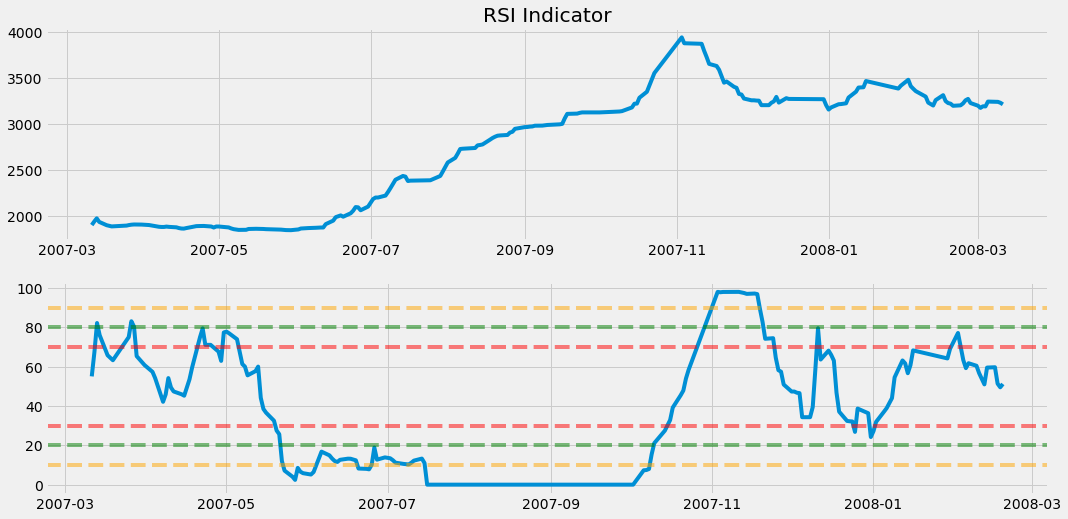

In [9]:
fig , (ax1 , ax2)=plt.subplots(nrows=2 , ncols=1 , figsize=(16,8))
ax1.plot(newdf['Close'],label='Close Price')
ax2.plot(newdf['RSI'],label='RSI')
ax2.axhline(10 , linestyle='--',color='orange',alpha=0.5)
ax2.axhline(20 , linestyle='--',color='green',alpha=0.5)
ax2.axhline(30 , linestyle='--',color='red',alpha=0.5)
ax2.axhline(70 , linestyle='--',color='red',alpha=0.5)
ax2.axhline(80 , linestyle='--',color='green',alpha=0.5)
ax2.axhline(90 , linestyle='--',color='orange',alpha=0.5)
ax1.set_title('RSI Indicator')
plt.show()